In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import vaex
import pickle

2022-02-18 17:34:01.302293: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-18 17:34:01.302364: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
pristine = pd.read_csv('/arc/home/aydanmckay/leftjoinpristinesspplamostlrsmilliquas.csv',
                   usecols=["CaHK_0_p","e_CaHK_p","pmra_1_p","pmra_error_1_p","pmdec_1_p","pmdec_error_1_p","g_chp_psf_p","r_chp_psf_p",
                            "i_chp_psf_p","z_chp_psf_p","y_chp_psf_p","MAG_AUTO_p",
                            "phot_g_mean_mag_1_p","phot_bp_mean_mag_1_p","phot_rp_mean_mag_1_p","AFE_s","FEH_ADOP_s","TEFF_ADOP_s","LOGG_ADOP_s",
                            "SNR_s","FEH_ADOP_UNC_s","RV_ADOP_UNC_s"])

In [3]:
pristine = pristine.loc[(pristine["g_chp_psf_p"] < 1e19) & (pristine["r_chp_psf_p"] < 1e19) & (pristine["i_chp_psf_p"] < 1e19) & \
                        (pristine["z_chp_psf_p"] < 1e19) & (pristine["y_chp_psf_p"] < 1e19) & (pristine["MAG_AUTO_p"] < 95) & \
                        (np.isnan(pristine["phot_g_mean_mag_1_p"]) == False) & (np.isnan(pristine["phot_bp_mean_mag_1_p"]) == False) & \
                        (np.isnan(pristine["pmra_1_p"]) == False) & (np.isnan(pristine["pmdec_1_p"]) == False) & \
                        (np.isnan(pristine["pmra_error_1_p"]) == False) & (np.isnan(pristine["pmdec_error_1_p"]) == False) & \
                        (np.isnan(pristine["phot_rp_mean_mag_1_p"]) == False) & (pristine['SNR_s'] > 25.) & (np.isnan(pristine['LOGG_ADOP_s']) == False) & \
                        (pristine['RV_ADOP_UNC_s'] < 10.) & (pristine['TEFF_ADOP_s'] < 7000.) & (pristine['FEH_ADOP_UNC_s'] < 0.2) & \
                        (pristine["e_CaHK_p"] < 0.05) & (pristine['FEH_ADOP_s'] > -5)]

In [4]:
df = pd.DataFrame({'PMRA': pristine['pmra_1_p'],
                   'PMDec': pristine['pmdec_1_p'],
                   'PMRAerr': pristine['pmra_error_1_p'],
                   'PMDecerr': pristine['pmdec_error_1_p'],
                   'G_gaia': pristine['CaHK_0_p']-pristine['phot_g_mean_mag_1_p'],
                   'B_gaia': pristine['CaHK_0_p']-pristine['phot_bp_mean_mag_1_p'],
                   'R_gaia': pristine['CaHK_0_p']-pristine['phot_rp_mean_mag_1_p'],
                   'G_pan': pristine['CaHK_0_p']-pristine['g_chp_psf_p'],
                   'R_pan': pristine['CaHK_0_p']-pristine['r_chp_psf_p'],
                   'I_pan': pristine['CaHK_0_p']-pristine['i_chp_psf_p'],
                   'Z_pan': pristine['CaHK_0_p']-pristine['z_chp_psf_p'],
                   'Y_pan': pristine['CaHK_0_p']-pristine['y_chp_psf_p'],
                   'AUTO_cfis': pristine['CaHK_0_p']-pristine['MAG_AUTO_p']})

df2 = pd.DataFrame({'FeH': pristine['FEH_ADOP_s']})

In [5]:
from umap.parametric_umap import ParametricUMAP
embedder0 = ParametricUMAP(verbose=True)
scaled_data = StandardScaler().fit_transform(df)
embedding0 = embedder0.fit_transform(scaled_data)

ParametricUMAP(optimizer=<keras.optimizer_v2.adam.Adam object at 0x7fcbe4126370>)
Fri Feb 18 17:34:25 2022 Construct fuzzy simplicial set
Fri Feb 18 17:34:25 2022 Finding Nearest Neighbors
Fri Feb 18 17:34:25 2022 Building RP forest with 12 trees
Fri Feb 18 17:34:25 2022 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Fri Feb 18 17:34:33 2022 Finished Nearest Neighbor Search
Fri Feb 18 17:34:36 2022 Construct embedding


2022-02-18 17:34:55.690442: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-18 17:34:55.690599: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-18 17:34:55.690657: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pristine): /proc/driver/nvidia/version does not exist
2022-02-18 17:34:55.691192: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
2789/2789 [==============================] - 15s 5ms/step - loss: 0.1424
Epoch 2/10
2789/2789 [==============================] - 14s 5ms/step - loss: 0.1299
Epoch 3/10
2789/2789 [==============================] - 14s 5ms/step - loss: 0.1274
Epoch 4/10
2789/2789 [==============================] - 14s 5ms/step - loss: 0.1257
Epoch 5/10
2789/2789 [==============================] - 14s 5ms/step - loss: 0.1250
Epoch 6/10
2789/2789 [==============================] - 14s 5ms/step - loss: 0.1238
Epoch 7/10
2789/2789 [==============================] - 14s 5ms/step - loss: 0.1229
Epoch 8/10
2789/2789 [==============================] - 14s 5ms/step - loss: 0.1221
Epoch 9/10
2789/2789 [==============================] - 14s 5ms/step - loss: 0.1217
Epoch 10/10
701/701 [==============================] - 1s 1ms/step
Fri Feb 18 17:37:15 2022 Finished embedding


In [6]:
# embedder.save('/arc/home/aydanmckay/')
# from umap.parametric_umap import load_ParametricUMAP
# embedder = load_ParametricUMAP('/your/path/here')

{'loss': [0.14240442216396332, 0.12990017235279083, 0.12735214829444885, 0.12574619054794312, 0.12502974271774292, 0.12380444258451462, 0.12285647541284561, 0.12211310118436813, 0.1216500848531723, 0.12161964178085327]}


Text(0.5, 0, 'Epoch')

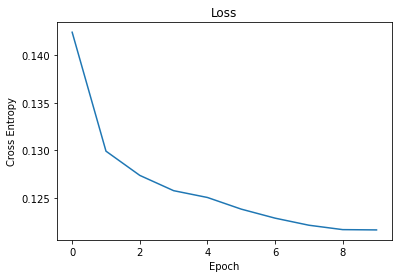

In [7]:
print(embedder0._history)
fig, ax = plt.subplots()
ax.plot(embedder0._history['loss'])
ax.set_title('Loss')
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

In [8]:
# Project data
# z = encoder.predict(X)

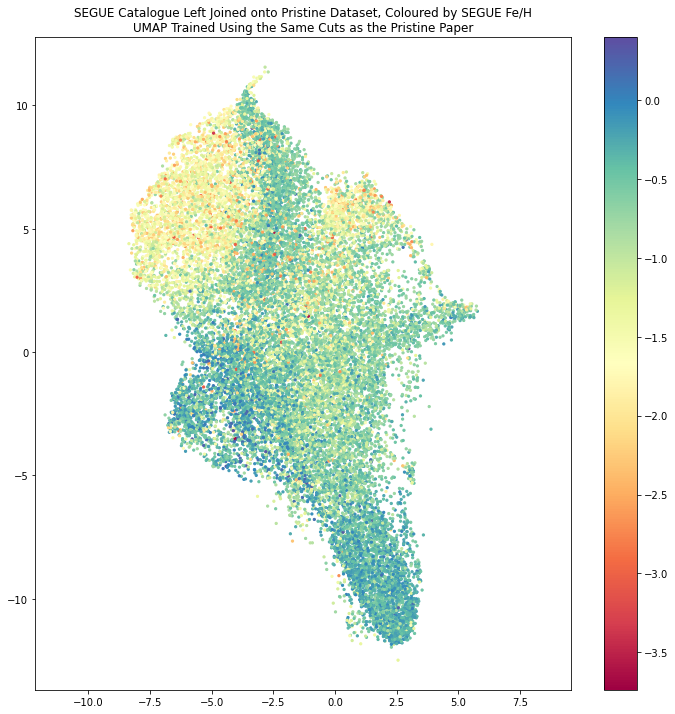

In [9]:
plt.figure(figsize=(12,12))
# mask_feh = data2['FeH'] > -9
plt.scatter(embedding0[:, 0], embedding0[:, 1],c=df2['FeH'], cmap='Spectral', s=5)
# plt.scatter(embedding[:, 0][mask_feh], embedding[:, 1][mask_feh],c=data2['FeH'][mask_feh], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()
plt.title("SEGUE Catalogue Left Joined onto Pristine Dataset, Coloured by SEGUE Fe/H\nUMAP Trained Using the Same Cuts as the Pristine Paper");

In [10]:
# df = vaex.from_pandas(pd.DataFrame({'PMRA': pristine['pmra_1_p'],
#                    'PMDec': pristine['pmdec_1_p'],
#                    'PMRAerr': pristine['pmra_error_1_p'],
#                    'PMDecerr': pristine['pmdec_error_1_p'],
#                    'G_gaia': pristine['CaHK_0_p']-pristine['phot_g_mean_mag_1_p'],
#                    'B_gaia': pristine['CaHK_0_p']-pristine['phot_bp_mean_mag_1_p'],
#                    'R_gaia': pristine['CaHK_0_p']-pristine['phot_rp_mean_mag_1_p'],
#                    'G_pan': pristine['CaHK_0_p']-pristine['g_chp_psf_p'],
#                    'R_pan': pristine['CaHK_0_p']-pristine['r_chp_psf_p'],
#                    'I_pan': pristine['CaHK_0_p']-pristine['i_chp_psf_p'],
#                    'Z_pan': pristine['CaHK_0_p']-pristine['z_chp_psf_p'],
#                    'Y_pan': pristine['CaHK_0_p']-pristine['y_chp_psf_p'],
#                    'AUTO_cfis': pristine['CaHK_0_p']-pristine['MAG_AUTO_p']}))

# df2 = pd.DataFrame({'FeH': pristine['FEH_ADOP_s']})

In [11]:
train, test, train_labels, test_labels = train_test_split(df, df2, test_size=0.2, random_state=42, shuffle=True)

In [12]:
train.shape

(17933, 13)

In [13]:
# define the network
import tensorflow as tf
dims = [13]
n_components = 2
encoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=dims),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=n_components),
])
encoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               3584      
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 69,890
Trainable params: 69,890
Non-trainable params: 0
_________________________________________________________________


In [14]:
embedder = ParametricUMAP(encoder=encoder, dims=dims)
embedding = embedder.fit_transform(train)

Epoch 1/10
2144/2144 [==============================] - 13s 6ms/step - loss: 0.0881
Epoch 2/10
2144/2144 [==============================] - 13s 6ms/step - loss: 0.0852
Epoch 3/10
2144/2144 [==============================] - 13s 6ms/step - loss: 0.0846
Epoch 4/10
2144/2144 [==============================] - 13s 6ms/step - loss: 0.0843
Epoch 5/10
2144/2144 [==============================] - 14s 6ms/step - loss: 0.0843
Epoch 6/10
2144/2144 [==============================] - 14s 6ms/step - loss: 0.0841
Epoch 7/10
2144/2144 [==============================] - 13s 6ms/step - loss: 0.0840
Epoch 8/10
2144/2144 [==============================] - 12s 5ms/step - loss: 0.0839
Epoch 9/10
2144/2144 [==============================] - 12s 6ms/step - loss: 0.0838
Epoch 10/10
2144/2144 [==============================] - 12s 5ms/step - loss: 0.0837


{'loss': [0.0880649983882904, 0.08515642583370209, 0.08455541729927063, 0.08429566025733948, 0.08425925672054291, 0.08410097658634186, 0.08404533565044403, 0.08394380658864975, 0.08376684039831161, 0.08369020372629166]}


Text(0.5, 0, 'Epoch')

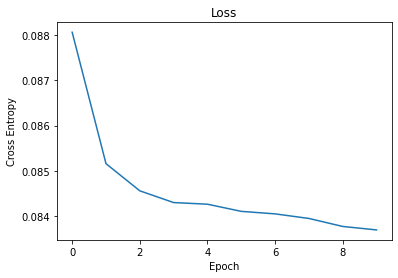

In [15]:
print(embedder._history)
fig, ax = plt.subplots()
ax.plot(embedder._history['loss'])
ax.set_title('Loss')
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

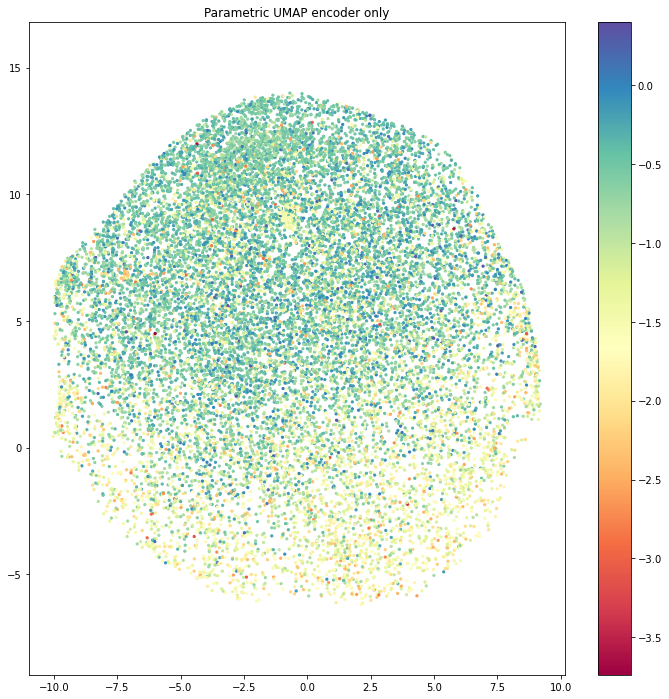

In [16]:
plt.figure(figsize=(12,12))
# mask_feh = data2['FeH'] > -9
plt.scatter(embedding[:, 0], embedding[:, 1],c=train_labels['FeH'], cmap='Spectral', s=5)
# plt.scatter(embedding[:, 0][mask_feh], embedding[:, 1][mask_feh],c=data2['FeH'][mask_feh], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()
plt.title("Parametric UMAP encoder only");

In [17]:
decoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_components)),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=13, activation="relu"),
    # tf.keras.layers.Reshape(target_shape=[13])
])

In [18]:
# scaled_train = StandardScaler().fit_transform(train)
# scaled_test = StandardScaler().fit_transform(test)
scaled_train = MinMaxScaler().fit_transform(train)
scaled_test = MinMaxScaler().fit_transform(test)
validation_images = scaled_test

In [19]:
embedder2 = ParametricUMAP(
    encoder=encoder,
    decoder=decoder,
    dims=dims,
    parametric_reconstruction= True,
    reconstruction_validation=validation_images,
    # autoencoder_loss = True,
    verbose=True,
    random_state=42
)
embedding2 = embedder2.fit_transform(scaled_train)

ParametricUMAP(decoder=<keras.engine.sequential.Sequential object at 0x7fcba17e14f0>, dims=[13], encoder=<keras.engine.sequential.Sequential object at 0x7fcba13c4d00>, optimizer=<keras.optimizer_v2.adam.Adam object at 0x7fcba0883e20>, parametric_reconstruction=True, reconstruction_validation=array([[0.58083153, 0.24582035, 0.0755814 , ..., 0.3034922 , 0.2874871 ,
        0.34214538],
       [0.52076863, 0.5577968 , 0.20494186, ..., 0.41419689, 0.41008704,
        0.34333959],
       [0.51534601, 0.5740288 , 0.05087209, ..., 0.47366884, 0.47295977,
        0.35478477],
       ...,
       [0.432025  , 0.62807753, 0.08139535, ..., 0.62445178, 0.64156635,
        0.36373165],
       [0.44741538, 0.6104668 , 0.02906977, ..., 0.45548511, 0.45262579,
        0.34133709],
       [0.43923216, 0.55136657, 0.09302326, ..., 0.37099633, 0.36474615,
        0.33931622]]))
Fri Feb 18 17:39:42 2022 Construct fuzzy simplicial set
Fri Feb 18 17:39:42 2022 Finding Nearest Neighbors
Fri Feb 18 17:39:42 20

{'loss': [0.8374665379524231, 0.8129940629005432, 0.8119763135910034, 0.8115746974945068, 0.8093041181564331, 0.8036255836486816, 0.8015106916427612, 0.8015134334564209, 0.8011953234672546, 0.8011954426765442], 'reconstruction_loss': [0.6931830644607544, 0.693133533000946, 0.693133533000946, 0.693133533000946, 0.6916763186454773, 0.6863635778427124, 0.6846327781677246, 0.6846141219139099, 0.6846082210540771, 0.6846250295639038], 'umap_loss': [0.14427052438259125, 0.1198459044098854, 0.11882992088794708, 0.11842857301235199, 0.11761876940727234, 0.11726289242506027, 0.11687673628330231, 0.1168992891907692, 0.11658601462841034, 0.11657197028398514], 'val_loss': [0.6931464076042175, 0.6931464076042175, 0.6931464076042175, 0.6931464076042175, 0.6873611211776733, 0.6873327493667603, 0.6874458193778992, 0.6873084902763367, 0.6873339414596558, 0.6850205659866333], 'val_reconstruction_loss': [0.6931464076042175, 0.6931464076042175, 0.6931464076042175, 0.6931464076042175, 0.6873611211776733, 0.

Text(0.5, 0, 'Epoch')

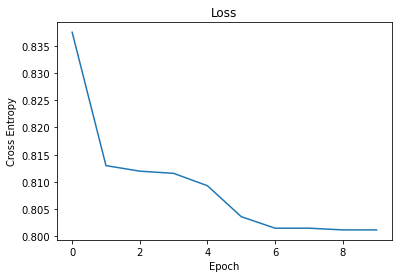

In [20]:
print(embedder2._history)
fig, ax = plt.subplots()
ax.plot(embedder2._history['loss'])
ax.set_title('Loss')
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

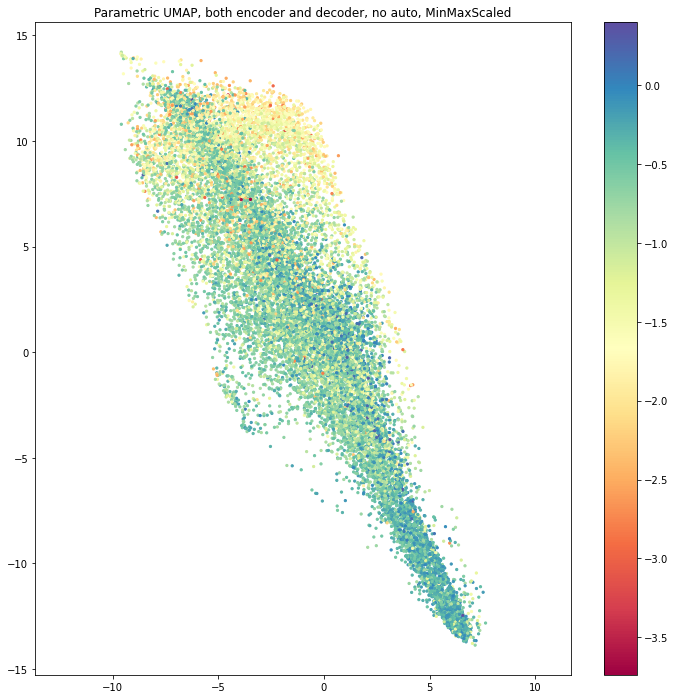

In [21]:
plt.figure(figsize=(12,12))
# mask_feh = data2['FeH'] > -9
plt.scatter(embedding2[:, 0], embedding2[:, 1],c=train_labels['FeH'], cmap='Spectral', s=5)
# plt.scatter(embedding[:, 0][mask_feh], embedding[:, 1][mask_feh],c=data2['FeH'][mask_feh], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()
plt.title("Parametric UMAP, both encoder and decoder, no auto, MinMaxScaled");

In [22]:
embedder3 = ParametricUMAP(
    encoder=encoder,
    decoder=decoder,
    dims=dims,
    parametric_reconstruction= True,
    reconstruction_validation=validation_images,
    autoencoder_loss = True,
    verbose=True,
    random_state=42
)
embedding3 = embedder3.fit_transform(scaled_train)

ParametricUMAP(autoencoder_loss=True, decoder=<keras.engine.sequential.Sequential object at 0x7fcba17e14f0>, dims=[13], encoder=<keras.engine.sequential.Sequential object at 0x7fcba13c4d00>, optimizer=<keras.optimizer_v2.adam.Adam object at 0x7fcba19f67c0>, parametric_reconstruction=True, reconstruction_validation=array([[0.58083153, 0.24582035, 0.0755814 , ..., 0.3034922 , 0.2874871 ,
        0.34214538],
       [0.52076863, 0.5577968 , 0.20494186, ..., 0.41419689, 0.41008704,
        0.34333959],
       [0.51534601, 0.5740288 , 0.05087209, ..., 0.47366884, 0.47295977,
        0.35478477],
       ...,
       [0.432025  , 0.62807753, 0.08139535, ..., 0.62445178, 0.64156635,
        0.36373165],
       [0.44741538, 0.6104668 , 0.02906977, ..., 0.45548511, 0.45262579,
        0.34133709],
       [0.43923216, 0.55136657, 0.09302326, ..., 0.37099633, 0.36474615,
        0.33931622]]))
Fri Feb 18 17:42:30 2022 Construct fuzzy simplicial set
Fri Feb 18 17:42:30 2022 Finding Nearest Neighbors

{'loss': [0.7988374829292297, 0.798454761505127, 0.7981601357460022, 0.7976236939430237, 0.7975214123725891, 0.7973965406417847, 0.7973436713218689, 0.7972204685211182, 0.7972919344902039, 0.7971703410148621], 'reconstruction_loss': [0.682604968547821, 0.6822082996368408, 0.681872546672821, 0.6816332936286926, 0.68165123462677, 0.6816422939300537, 0.6816520094871521, 0.681616485118866, 0.6816456913948059, 0.6816200017929077], 'umap_loss': [0.11623106151819229, 0.1162460520863533, 0.1162874773144722, 0.11599166691303253, 0.11586987972259521, 0.11575490236282349, 0.11569300293922424, 0.11560384929180145, 0.11564645916223526, 0.11554824560880661], 'val_loss': [0.6832635402679443, 0.6831976175308228, 0.6815015077590942, 0.6814678311347961, 0.6816405653953552, 0.6815775036811829, 0.6815398335456848, 0.6815398931503296, 0.6815597414970398, 0.6814139485359192], 'val_reconstruction_loss': [0.6832635402679443, 0.6831976175308228, 0.6815015077590942, 0.6814678311347961, 0.6816405653953552, 0.681

Text(0.5, 0, 'Epoch')

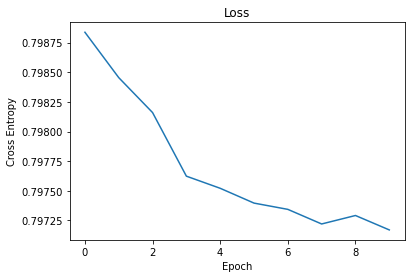

In [23]:
print(embedder3._history)
fig, ax = plt.subplots()
ax.plot(embedder3._history['loss'])
ax.set_title('Loss')
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

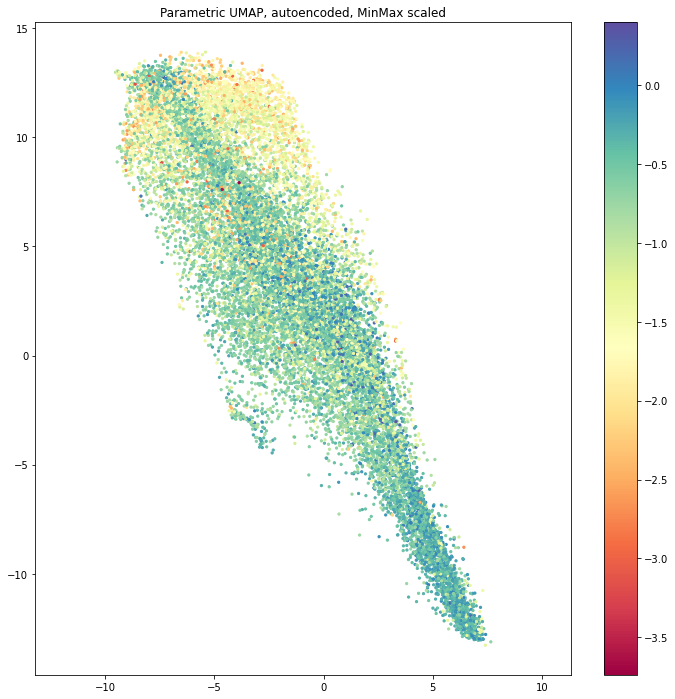

In [24]:
plt.figure(figsize=(12,12))
# mask_feh = data2['FeH'] > -9
plt.scatter(embedding3[:, 0], embedding3[:, 1],c=train_labels['FeH'], cmap='Spectral', s=5)
# plt.scatter(embedding[:, 0][mask_feh], embedding[:, 1][mask_feh],c=data2['FeH'][mask_feh], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar()
plt.title("Parametric UMAP, autoencoded, MinMax scaled");

In [25]:
# @article{sainburg2021parametric,
#   title={Parametric UMAP Embeddings for Representation and Semisupervised Learning},
#   author={Sainburg, Tim and McInnes, Leland and Gentner, Timothy Q},
#   journal={Neural Computation},
#   volume={33},
#   number={11},
#   pages={2881--2907},
#   year={2021},
#   publisher={MIT Press One Rogers Street, Cambridge, MA 02142-1209, USA journals-info~…}
# }

In [27]:
embedder3._history

{'loss': [0.7988374829292297,
  0.798454761505127,
  0.7981601357460022,
  0.7976236939430237,
  0.7975214123725891,
  0.7973965406417847,
  0.7973436713218689,
  0.7972204685211182,
  0.7972919344902039,
  0.7971703410148621],
 'reconstruction_loss': [0.682604968547821,
  0.6822082996368408,
  0.681872546672821,
  0.6816332936286926,
  0.68165123462677,
  0.6816422939300537,
  0.6816520094871521,
  0.681616485118866,
  0.6816456913948059,
  0.6816200017929077],
 'umap_loss': [0.11623106151819229,
  0.1162460520863533,
  0.1162874773144722,
  0.11599166691303253,
  0.11586987972259521,
  0.11575490236282349,
  0.11569300293922424,
  0.11560384929180145,
  0.11564645916223526,
  0.11554824560880661],
 'val_loss': [0.6832635402679443,
  0.6831976175308228,
  0.6815015077590942,
  0.6814678311347961,
  0.6816405653953552,
  0.6815775036811829,
  0.6815398335456848,
  0.6815398931503296,
  0.6815597414970398,
  0.6814139485359192],
 'val_reconstruction_loss': [0.6832635402679443,
  0.68319